# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;font-size:150%;border-radius:5px 5px;text-align:center;"> Sentence Tokenization</p>

<p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 40px;font-size:150%;border-radius:5px 5px;text-align:left;">Natural Language Processing</p>


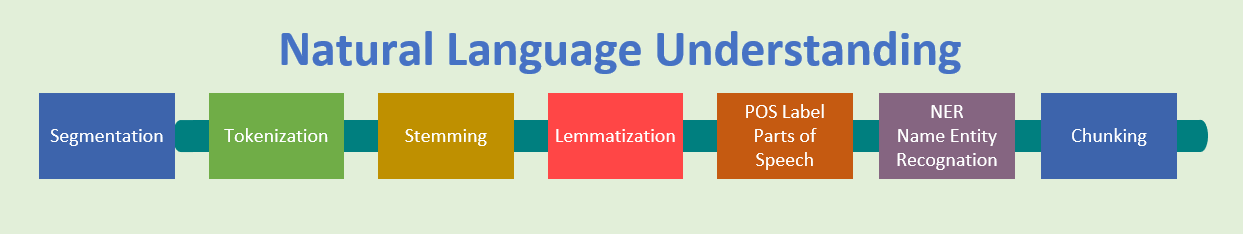

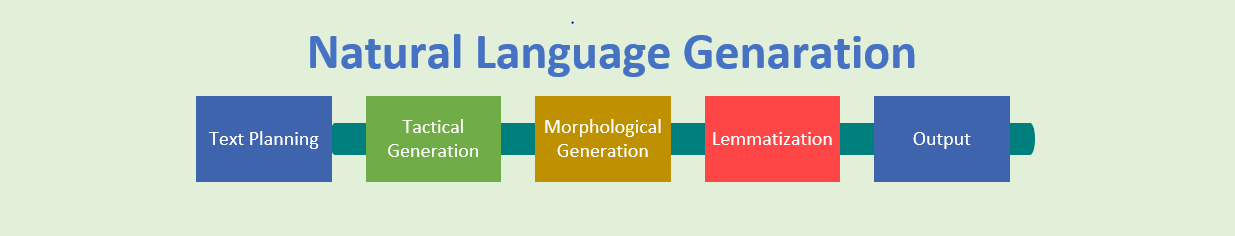

# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">Important Libaries</p>


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")


# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">List of Parameters</p>

`embeddinng_dimension` converts each word into a fixed length vector of defined size/structural format. Word embeddings can be thought of as an alternate to one-hot encoding along with dimensionality reduction. An embedding is a relatively low-dimensional space into which you can translate high-dimensional vectors. 

`max_len` maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence.

`verbose =1` shows the visual update during model fitting. If it is **0** no visualization status

`GlobalMaxPooling2D` reduces the dimentionality of outputs for Convo layers. It can replace the flatten layer and some cases Dense layer. In `MaxPooling2D`, it will extract max value as per segmented based on kernal size whereas in `GlobalMaxPooling2D`, it will extract max value from whole kernal

https://androidkt.com/explain-pooling-layers-max-pooling-average-pooling-global-average-pooling-and-global-max-pooling/
https://www.researchgate.net/figure/The-difference-of-max-pooling-and-global-max-pooling_fig4_338079465

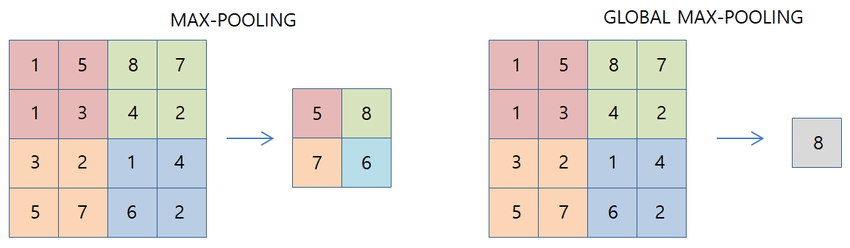!

`from tensorflow.keras.layers import concatenate` **add layer** adds two input tensor while **concatenate** appends two tensors

**Example:**

`a = tf.constant([1,2,3])`

`b = tf.constant([4,5,6])`

`add = keras.layers.Add()`

`print(K.eval(add([a,b])))`

`#output: [5 7 9]`

`concat = keras.layers.Concatenate()`

`print(K.eval(concat([a,b])))`

`#output: array([1, 2, 3, 4, 5, 6], dtype=int32)`



**Embedding Layer Parameters**
ref: https://www.kaggle.com/code/rajmehra03/a-detailed-explanation-of-keras-embedding-layer

`Embedding(input_dim = xxxx, output_dim = xxxx, input_length =xxxx)`

`Embedding` has produced higher dimensional data into lower dimensional vector space.

`input_dim`(Integer) sets of vocabularies/words

`output_dim`(Integer) number of dimension we would like to embed. Each word will be represented by a vector of this dimensions.

`input_length`(Integer) will be equal to the length (ie no of words) of the document with maximum length or maximum number of words.`

**normalization** is a process to balance the imbalance data where there is high mergin of gap between **Input Variable** before pass to layers

`BatchNormalization`is a techique to normalize and stablished the layers by **re-centering** and **re-scaling**. It will improve the model effeciency and reduce the time
 of model training. Say for, One /some of the **weight value changes dustrically (very high/very low)** which creates **imbalance** during NN training. It will normalize the output of activation function with the help of `mean` and `standard deviation` using **Gradient Process**


`BatchNormalization` depends on `Batch_Size` since it performs batch by batch


`Dropout` removes some of the weights/neurons during training based on probability and we can avoid **overfitting**


# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">Data Preprocessing</p>

In [9]:
num_features = 3000
sequence_length = 300
embedding_dimensions = 100

**Splitting Train and Test Data**

In [116]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_features)

<p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 100px; height: 40px;font-size:150%;border-radius:5px 5px;text-align:left;">Features</p>


In [117]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2, 2, 134, 26, 4, 715, 8, 

<p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 100px; height: 40px;font-size:150%;border-radius:5px 5px;text-align:left;">Target</p>


In [118]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
X_train = pad_sequences(X_train, maxlen = sequence_length)
X_test = pad_sequences(X_test, maxlen = sequence_length)

In [12]:
print("X_train", '\n', X_train)
print("-----------------------------------")
print("-----------------------------------")
print("X_test", '\n', X_test)

X_train 
 [[  0   0   0 ...  19 178  32]
 [  0   0   0 ...  16 145  95]
 [  0   0   0 ...   7 129 113]
 ...
 [  0   0   0 ...   4   2   2]
 [  0   0   0 ...  12   9  23]
 [  0   0   0 ... 204 131   9]]
-----------------------------------
-----------------------------------
X_test 
 [[   0    0    0 ...   14    6  717]
 [   0    0    0 ...  125    4    2]
 [1239    2  137 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846    2]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]


In [13]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (25000, 300)
X_test: (25000, 300)
y_train: (25000,)
y_test: (25000,)


# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">Build Model-01</p>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, Flatten, MaxPooling2D
from tensorflow.keras import optimizers

In [16]:
def imdb_cnn():
    model = Sequential()
    
    #embedding layer to create vector representation of each word => Fine-Tuned will happen every iteration
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimensions, input_length = sequence_length))
    model.add(Conv1D(filters =50, kernel_size = 5, strides=2, padding ='valid'))
    model.add(MaxPooling1D(2, padding ='valid'))
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation("relu"))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    
    adam = optimizers.Adam(lr=0.001)
    
    model.compile(loss="binary_crossentropy", optimizer = adam, metrics=['accuracy'])
    
    return model

In [17]:
model = imdb_cnn()

2022-10-07 16:18:04.241432: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
%%time
history = model.fit(X_train, y_train, batch_size=64, epochs = 10, validation_split = 0.2, verbose =1)

2022-10-07 16:18:06.196572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
313/313 [==============================] - 13s 39ms/step - loss: 0.5011 - accuracy: 0.7142 - val_loss: 0.3063 - val_accuracy: 0.8732
Epoch 2/10
313/313 [==============================] - 11s 36ms/step - loss: 0.2484 - accuracy: 0.8982 - val_loss: 0.3075 - val_accuracy: 0.8724
Epoch 3/10
313/313 [==============================] - 11s 36ms/step - loss: 0.1411 - accuracy: 0.9510 - val_loss: 0.3643 - val_accuracy: 0.8644
Epoch 4/10
313/313 [==============================] - 12s 39ms/step - loss: 0.0460 - accuracy: 0.9894 - val_loss: 0.4289 - val_accuracy: 0.8620
Epoch 5/10
313/313 [==============================] - 12s 38ms/step - loss: 0.0109 - accuracy: 0.9988 - val_loss: 0.5109 - val_accuracy: 0.8636
Epoch 6/10
313/313 [==============================] - 12s 39ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.5954 - val_accuracy: 0.8636
Epoch 7/10
313/313 [==============================] - 13s 40ms/step - loss: 7.3988e-04 - accuracy: 1.0000 - val_loss: 0.6496 - val_accur

In [20]:
def history_plot(model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training', 'validation'], loc ='upper left')
    plt.show()
    
    result = model.evaluate(X_test, y_test)
    print("test accuracy:", result[1])

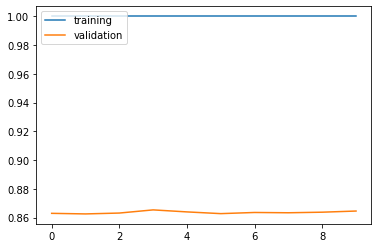

782/782 [==============================] - 7s 9ms/step - loss: 1.0072 - accuracy: 0.8539
test accuracy: 0.8539199829101562


In [69]:
history_plot(model)

# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">Build Model-02</p>

In [23]:
from tensorflow.keras.layers import Reshape, Conv2D, GlobalMaxPooling2D

In [24]:
def imdb_cnn2():
    model = Sequential()
    
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimensions, input_length = sequence_length ))
    model.add(Reshape((sequence_length, embedding_dimensions,1), input_shape = (sequence_length, embedding_dimensions)))
    model.add(Conv2D(filters = 50, kernel_size =(5, embedding_dimensions), strides = (1,1), padding = 'valid'))
    model.add(GlobalMaxPooling2D())
    
    
    model.add(Dense(10))
    model.add(Activation("relu"))
    model.add(Dropout(0.3)) #to avoid overfitting as GlobalMaxPool works on whole kernal
              
    model.add(Dense(10))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
              
    adam =optimizers.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics =['accuracy'])
              
    return model

In [25]:
model2 = imdb_cnn2()

In [26]:
%%time
history = model2.fit(X_train, y_train, batch_size=64, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
313/313 [==============================] - 38s 120ms/step - loss: 0.5951 - accuracy: 0.6687 - val_loss: 0.4037 - val_accuracy: 0.8404
Epoch 2/10
313/313 [==============================] - 37s 119ms/step - loss: 0.3888 - accuracy: 0.8490 - val_loss: 0.3176 - val_accuracy: 0.8708
Epoch 3/10
313/313 [==============================] - 38s 119ms/step - loss: 0.2951 - accuracy: 0.9003 - val_loss: 0.2918 - val_accuracy: 0.8804
Epoch 4/10
313/313 [==============================] - 37s 117ms/step - loss: 0.2321 - accuracy: 0.9270 - val_loss: 0.3242 - val_accuracy: 0.8776
Epoch 5/10
313/313 [==============================] - 36s 116ms/step - loss: 0.1776 - accuracy: 0.9510 - val_loss: 0.3430 - val_accuracy: 0.8816
Epoch 6/10
313/313 [==============================] - 37s 117ms/step - loss: 0.1366 - accuracy: 0.9637 - val_loss: 0.3751 - val_accuracy: 0.8832
Epoch 7/10
313/313 [==============================] - 36s 116ms/step - loss: 0.1115 - accuracy: 0.9727 - val_loss: 0.4627 - val_ac

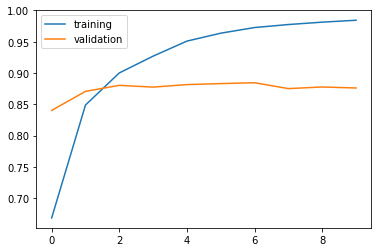

782/782 [==============================] - 11s 14ms/step - loss: 0.5979 - accuracy: 0.8722
test accuracy: 0.872160017490387


In [27]:
history_plot(model2)

# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">Build Model-03</p>

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Input

In [29]:
filter_sizes = [3,4,5]

`

**Here we run three convolutions model by changing the filter_sizes and concat them all in output**

**Hints**

`filter_sizes = [3,4,5]`

`squence_length = 5`

`squence_length - fs + 1, 1` = 5-5, 1 `(1,1)`

In [34]:
def convolution():
    inn =Input(shape = (sequence_length, embedding_dimensions, 1))
    convolutions =[]
    #perform three convolutions & pooling. Later we will concat
    for fs in filter_sizes:
        conv = Conv2D(filters = 100, kernel_size = (fs, embedding_dimensions), strides =(1,1), padding = 'valid')(inn)
        nonlinearity = Activation('relu')(conv)
        maxpooling = MaxPooling2D(pool_size = (sequence_length - fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpooling)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)

  
    
    return model
    

In [37]:
def imdb_cnn3():
    
    model = Sequential()
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimensions, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimensions, 1), input_shape =(sequence_length, embedding_dimensions)))
    
    #call concatinated convolution layers
    model.add(convolution()) 
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation("relu"))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model
    

In [38]:
model3 = imdb_cnn3()

In [40]:
%%time

history = model3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split = 0.2, verbose =1)

Epoch 1/10
313/313 [==============================] - 135s 428ms/step - loss: 0.5483 - accuracy: 0.6988 - val_loss: 0.3484 - val_accuracy: 0.8560
Epoch 2/10
313/313 [==============================] - 133s 426ms/step - loss: 0.3592 - accuracy: 0.8406 - val_loss: 0.2932 - val_accuracy: 0.8808
Epoch 3/10
313/313 [==============================] - 137s 437ms/step - loss: 0.2679 - accuracy: 0.8992 - val_loss: 0.2830 - val_accuracy: 0.8846
Epoch 4/10
313/313 [==============================] - 135s 429ms/step - loss: 0.2074 - accuracy: 0.9275 - val_loss: 0.3083 - val_accuracy: 0.8732
Epoch 5/10
313/313 [==============================] - 133s 425ms/step - loss: 0.1625 - accuracy: 0.9431 - val_loss: 0.3799 - val_accuracy: 0.8796
Epoch 6/10
313/313 [==============================] - 133s 426ms/step - loss: 0.1210 - accuracy: 0.9585 - val_loss: 0.4273 - val_accuracy: 0.8854
Epoch 7/10
313/313 [==============================] - 134s 428ms/step - loss: 0.0978 - accuracy: 0.9656 - val_loss: 0.4756 -

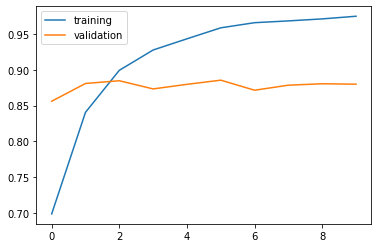

782/782 [==============================] - 49s 63ms/step - loss: 0.6736 - accuracy: 0.8755
test accuracy: 0.8754799962043762


In [41]:
history_plot(model3)

# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">Build Model-04</p>

In [42]:
from tensorflow.keras.layers import BatchNormalization

In [43]:
filter_size = [3,4,5]

In [64]:
def convolution2():
    inn = Input(shape = (sequence_length, embedding_dimensions,1))
    convolutions = []
    for fs in filter_size:
        conv = Conv2D(filters =100, kernel_size =(fs, embedding_dimensions), strides=(1,1), padding="valid")(inn)
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (sequence_length - fs +1, 1), padding="valid")(nonlinearity)
        convolutions.append(maxpool)
    outt = concatenate(convolutions) #concat three output for 3 filter size
    model = Model(inputs = inn, outputs = outt)
    
    return model

In [65]:
def imdb_cnn4():
    model =Sequential()
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimensions, input_length= sequence_length))
    model.add(Reshape((sequence_length, embedding_dimensions, 1), input_shape=(sequence_length, embedding_dimensions)))
    model.add(Dropout(0.5))
    
    #call conactenated Convolution layers
    model.add(convolution2())
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer= adam, metrics =['accuracy'])
    return model
    

In [66]:
model4 = imdb_cnn4()

In [67]:
history = model4.fit(X_train, y_train, batch_size= 64, epochs = 10, validation_split =0.2, verbose=1)

Epoch 1/10
313/313 [==============================] - 141s 445ms/step - loss: 0.6557 - accuracy: 0.5960 - val_loss: 0.8517 - val_accuracy: 0.5784
Epoch 2/10
313/313 [==============================] - 135s 432ms/step - loss: 0.4573 - accuracy: 0.8123 - val_loss: 0.4640 - val_accuracy: 0.7682
Epoch 3/10
313/313 [==============================] - 135s 431ms/step - loss: 0.3979 - accuracy: 0.8436 - val_loss: 0.3689 - val_accuracy: 0.8146
Epoch 4/10
313/313 [==============================] - 136s 435ms/step - loss: 0.3661 - accuracy: 0.8562 - val_loss: 0.3568 - val_accuracy: 0.8442
Epoch 5/10
313/313 [==============================] - 134s 429ms/step - loss: 0.3519 - accuracy: 0.8669 - val_loss: 0.3005 - val_accuracy: 0.8740
Epoch 6/10
313/313 [==============================] - 132s 421ms/step - loss: 0.3343 - accuracy: 0.8709 - val_loss: 0.4451 - val_accuracy: 0.7376
Epoch 7/10
313/313 [==============================] - 131s 419ms/step - loss: 0.3102 - accuracy: 0.8802 - val_loss: 0.4240 -

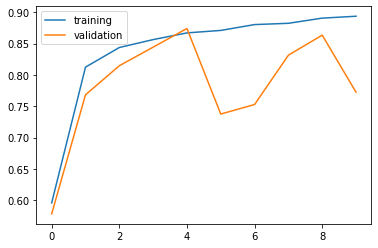

782/782 [==============================] - 50s 63ms/step - loss: 0.5198 - accuracy: 0.7710
test accuracy: 0.7709599733352661


In [68]:
history_plot(model4)

# <p style="background-color:#288BA8;font-family:newtimeroman;color:#EFF0F7;width: 600px; height: 50px;font-size:150%;border-radius:5px 5px;text-align:left;">Summary</p>

In [85]:
#def test_result_evaluate(models):
models= [model, model2, model3, model4]
accuracy=[]
for i in models:
    result = i.evaluate(X_test, y_test)
    accuracy.append(result[1])
    print("test accuracy", result[1])
    


782/782 [==============================] - 4s 5ms/step - loss: 0.7657 - accuracy: 0.8562
test accuracy 0.8561599850654602
782/782 [==============================] - 11s 15ms/step - loss: 0.5979 - accuracy: 0.8722
test accuracy 0.872160017490387
782/782 [==============================] - 49s 62ms/step - loss: 0.6736 - accuracy: 0.8755
test accuracy 0.8754799962043762
782/782 [==============================] - 50s 64ms/step - loss: 0.5198 - accuracy: 0.7710
test accuracy 0.7709599733352661


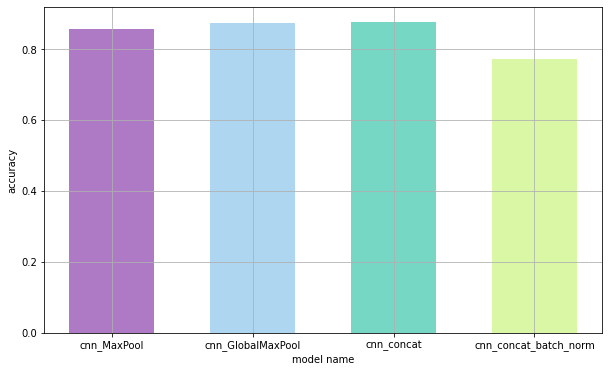

In [115]:
model_name = ['cnn_MaxPool', 'cnn_GlobalMaxPool', 'cnn_concat', 'cnn_concat_batch_norm']
c = ['#AF7AC5', '#AED6F1', '#76D7C4', '#DAF7A6']
fig = plt.figure(figsize = (10, 6))
plt.bar(model_name, accuracy, color = c, width =0.6)
plt.grid(True)
plt.xlabel("model name") 
plt.ylabel("accuracy")
plt.show()